In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import ExtraTreesRegressor
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set()

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## Read and Understand the data sets

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

Inference: the train data set has 1460 rows and 81 colums, while the test dataset has 1459 rows and 80 columns. The test dataset has one column less than the train dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Inference : The test dataset does not have the target variable [SalePrice]

In [ ]:
# define train target
target=df_train['SalePrice']

In [ ]:
#Combining train and test dataset for preprocessing
df_main=pd.concat([df_train,df_test], ignore_index=True,sort=False)
df_main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
#Dropping SalePrice
df_main.drop('SalePrice',axis=1,inplace=True)

In [ ]:
df_main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Checking for NULL values

In [ ]:
round((df_main.isnull().sum()/len(df_main))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.14
LotFrontage      16.65
LotArea           0.00
Street            0.00
Alley            93.22
LotShape          0.00
LandContour       0.00
Utilities         0.07
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.03
Exterior2nd       0.03
MasVnrType        0.82
MasVnrArea        0.79
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.77
BsmtCond          2.81
BsmtExposure      2.81
BsmtFinType1      2.71
BsmtFinSF1        0.03
BsmtFinType2      2.74
BsmtFinSF2        0.03
BsmtUnfSF         0.03
TotalBsmtSF       0.03
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.03
1stFlrSF   

#### Inference : We do have missing values in the some of the columns

## Handling the missing values

In [ ]:
def check_missing(df):
    df_missing={}
    for key in df.columns:
        if df[key].isnull().sum() > 0:
            df_missing[key]=round((df[key].isnull().sum()  /  len(df[key]) ) * 100,2)

    #Create missing values dataframe
    df_missing=pd.DataFrame(df_missing,index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)
    return df_missing

In [ ]:
df_missing = check_missing(df_main)

In [ ]:
df_missing.head()

,MissingValues
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
FireplaceQu,48.65


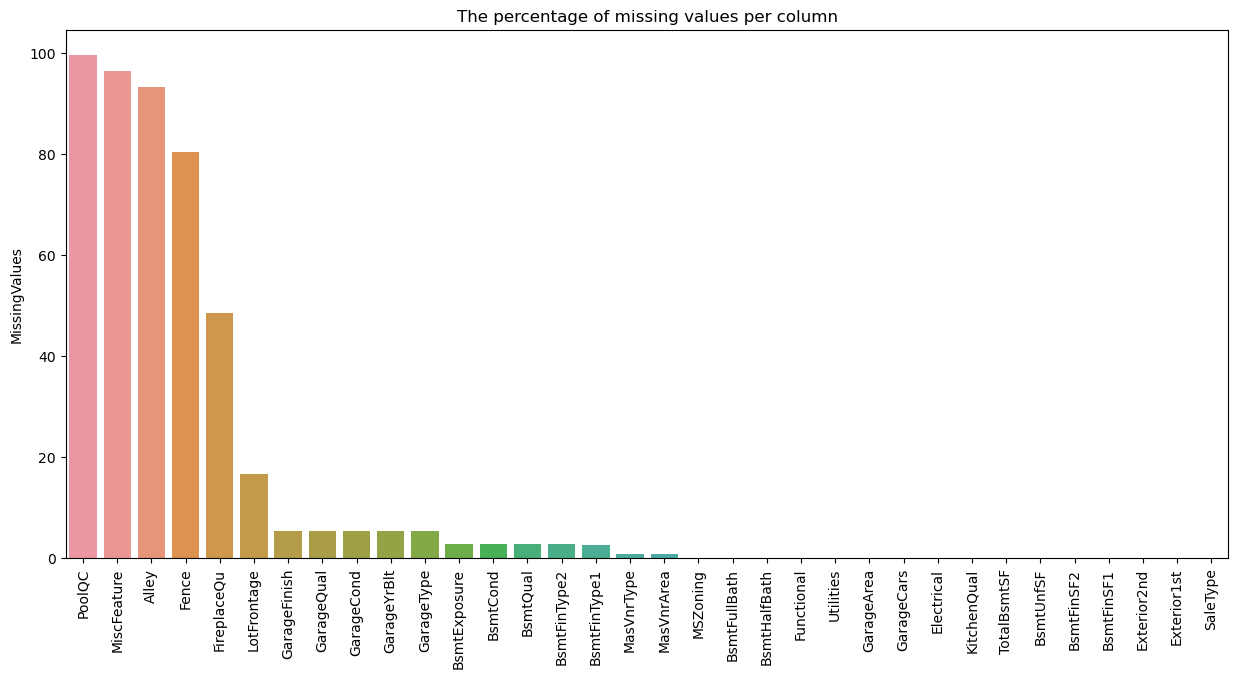

In [ ]:
#Plotting the percentage of missing values per column
plt.figure(figsize=(15,7),dpi=100)
plt.xticks(rotation=90)
sns.barplot(y=df_missing.MissingValues,x=df_missing.index, orient='v').set_title('The percentage of missing values per column')
plt.show()

### Handling the missing values for Categorical columns

In [ ]:
cat_cols = df_main.select_dtypes(include='object').columns.tolist()

In [ ]:
len(cat_cols)

43

In [ ]:
check_missing(df_main[cat_cols])

,MissingValues
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
FireplaceQu,48.65
GarageQual,5.45
GarageFinish,5.45
GarageCond,5.45
GarageType,5.38
BsmtCond,2.81


In [ ]:
#Filling missing values for categorical features
df_main['Alley'].fillna('NA',inplace=True)
df_main['PoolQC'].fillna('NA',inplace=True)
df_main['Fence'].fillna('NA',inplace=True)
df_main['MiscFeature'].fillna('NA',inplace=True)
df_main['FireplaceQu'].fillna('NA',inplace=True)
df_main['GarageCond'].fillna('NA',inplace=True)
df_main['GarageQual'].fillna('NA',inplace=True)
df_main['GarageFinish'].fillna('NA',inplace=True)
df_main['GarageType'].fillna('NA',inplace=True)
df_main['BsmtExposure'].fillna('NA',inplace=True)
df_main['BsmtFinType2'].fillna('NA',inplace=True)
df_main['BsmtFinType1'].fillna('NA',inplace=True)
df_main['BsmtQual'].fillna('NA',inplace=True)
df_main['BsmtCond'].fillna('NA',inplace=True)

In [ ]:
check_missing(df_main[cat_cols])

,MissingValues
MasVnrType,0.82
MSZoning,0.14
Utilities,0.07
Functional,0.07
Exterior1st,0.03
Exterior2nd,0.03
Electrical,0.03
KitchenQual,0.03
SaleType,0.03


In [ ]:
#Fill MasVnrType missing values with 'None'
df_main['MasVnrType'].fillna('None',inplace=True)

In [ ]:
#Fill with mode value
df_main['Electrical'].fillna(df_main.Electrical.mode()[0],inplace=True)
df_main['MSZoning'].fillna(df_main.MSZoning.mode()[0],inplace=True)
df_main['Utilities'].fillna(df_main.Utilities.mode()[0],inplace=True)
df_main['Functional'].fillna(df_main.Functional.mode()[0],inplace=True)
df_main['SaleType'].fillna(df_main.SaleType.mode()[0],inplace=True)
df_main['Exterior2nd'].fillna(df_main.Exterior2nd.mode()[0],inplace=True)
df_main['Exterior1st'].fillna(df_main.Exterior1st.mode()[0],inplace=True)
df_main['KitchenQual'].fillna(df_main.KitchenQual.mode()[0],inplace=True)

In [ ]:
check_missing(df_main[cat_cols])

,MissingValues


#### Inference: Missing values for all the Categorical columns is now treated.

### Handling the missing values for Numerical columns

In [ ]:
num_cols = df_main.select_dtypes(exclude='object').columns.tolist()


In [ ]:
df_main[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [ ]:
df_missing =check_missing(df_main[num_cols])

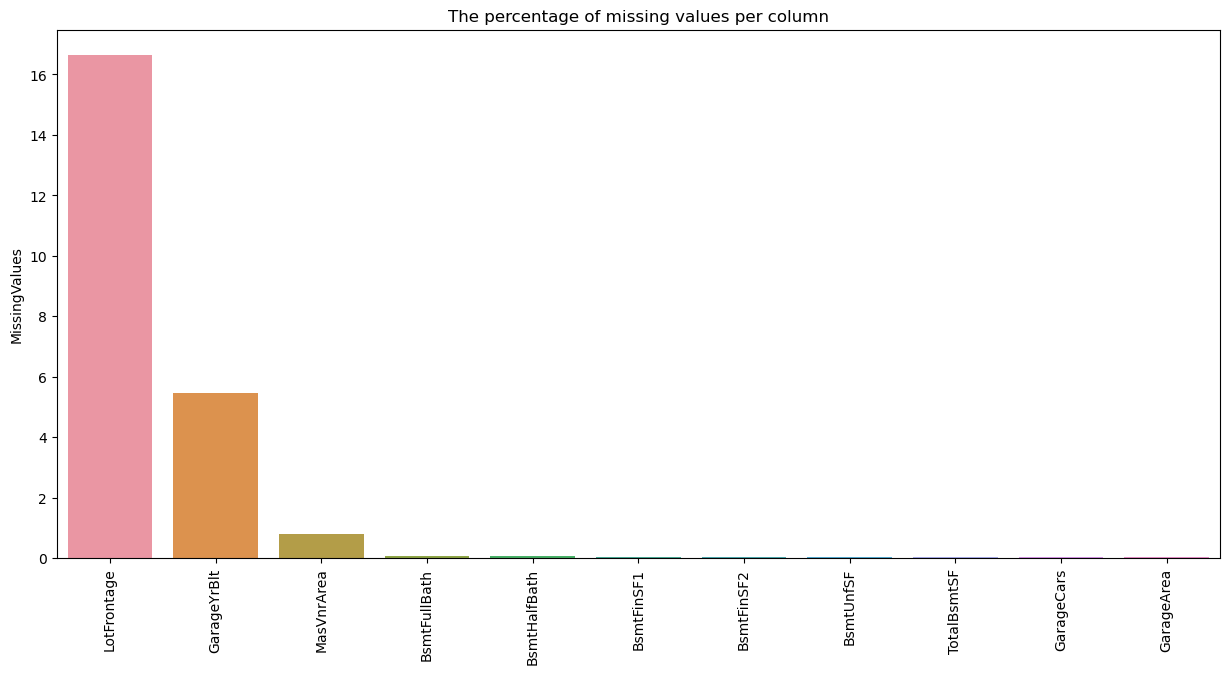

In [ ]:
#Plotting the percentage of missing values per column
plt.figure(figsize=(15,7),dpi=100)
plt.xticks(rotation=90)
sns.barplot(y=df_missing.MissingValues,x=df_missing.index, orient='v').set_title('The percentage of missing values per column')
plt.show()

In [ ]:
df_missing

,MissingValues
LotFrontage,16.65
GarageYrBlt,5.45
MasVnrArea,0.79
BsmtFullBath,0.07
BsmtHalfBath,0.07
BsmtFinSF1,0.03
BsmtFinSF2,0.03
BsmtUnfSF,0.03
TotalBsmtSF,0.03
GarageCars,0.03


In [ ]:
# Cheking GarageType where GarageYrBlt is missing 
df_main[['GarageYrBlt','GarageType']].loc[df_main.GarageYrBlt.isnull()]

,GarageYrBlt,GarageType
39,NaN,NA
48,NaN,NA
78,NaN,NA
88,NaN,NA
89,NaN,NA
99,NaN,NA
108,NaN,NA
125,NaN,NA
127,NaN,NA
140,NaN,NA


#### Inference: Since there is no garage for these houses, it's not a good idea to fill these NaNs with the mean or median, it makes sense to fill it with 0

In [ ]:
# fill GarageYrBlt missings with the mean
df_main['GarageYrBlt'].fillna(0, inplace=True)

In [ ]:
#fill with median or 0
df_main['BsmtHalfBath'].fillna(df_main.BsmtHalfBath.median(), inplace=True)
df_main['BsmtFullBath'].fillna(df_main.BsmtFullBath.median(), inplace=True)
df_main['GarageCars'].fillna(0, inplace=True)
df_main['TotalBsmtSF'].fillna(df_main.TotalBsmtSF.median(), inplace=True)
df_main['BsmtUnfSF'].fillna(0 , inplace=True)
df_main['BsmtFinSF2'].fillna(df_main.BsmtFinSF2.median(), inplace=True)
df_main['GarageArea'].fillna(0, inplace=True)
df_main['BsmtFinSF1'].fillna(df_main.BsmtFinSF1.median(), inplace=True)
df_main['MasVnrArea'].fillna(df_main['MasVnrArea'].median(), inplace=True)

In [ ]:
df_missing =check_missing(df_main[num_cols])
df_missing

,MissingValues
LotFrontage,16.65


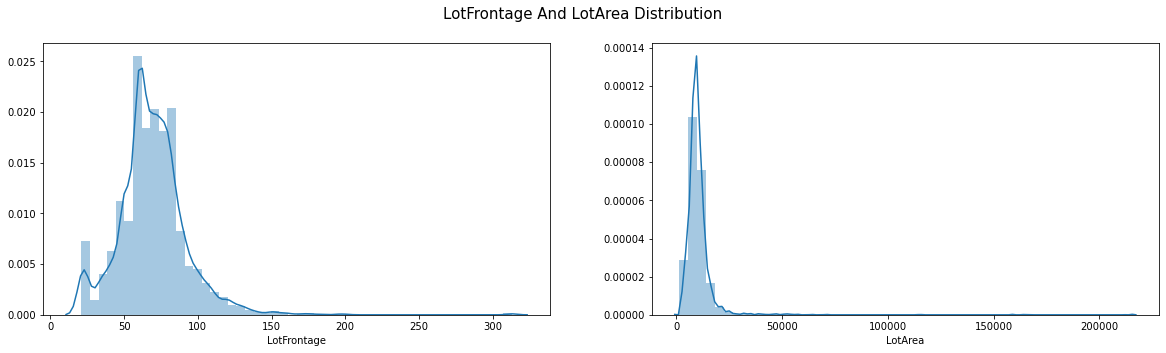

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('LotFrontage And LotArea Distribution',size=15)
sns.distplot(df_main.LotFrontage,ax=ax[0])
sns.distplot(df_main.LotArea,ax=ax[1])
plt.show()

In [ ]:
#Temp dataframe
Lot_tmp=df_main[['LotFrontage','LotArea']][~df_main.LotFrontage.isnull()]
#Calculating z-score to remove outliers
z = np.abs(stats.zscore(Lot_tmp))
#remove outliers
Lot_tmp_Z=Lot_tmp[(z < 3).all(axis=1)]

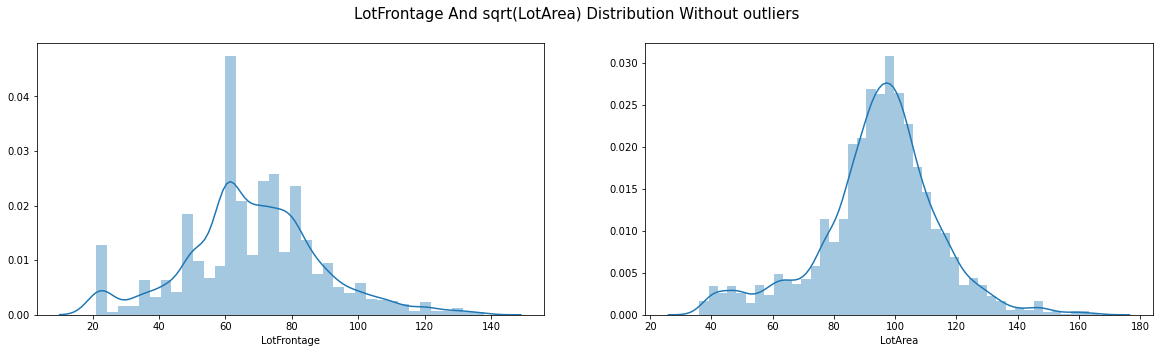

In [ ]:
##Plot Lotfrontage and LotArea distribution without outliers
fig,ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('LotFrontage And sqrt(LotArea) Distribution Without outliers',size=15)
sns.distplot(Lot_tmp_Z.LotFrontage, ax=ax[0])
sns.distplot(Lot_tmp_Z.LotArea.apply(np.sqrt), ax=ax[1])
plt.show()

[Text(0.5, 1.0, 'Relation Between LotFrontage And Sqrt(LotArea)')]

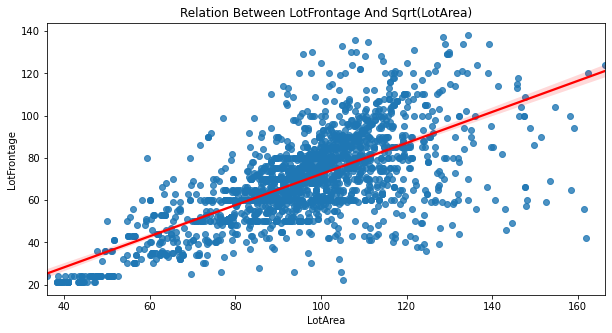

In [ ]:
# Plotting LotFrontage and LotArea
plt.figure(figsize=(10,5))
sns.regplot(x=Lot_tmp_Z.LotArea.apply(np.sqrt),y=Lot_tmp_Z.LotFrontage,
            line_kws={"color": "red"}).set(title='Relation Between LotFrontage And Sqrt(LotArea)')

### Inference: so there is a rise for LotFrontage as the sqrt(LotArea) increases

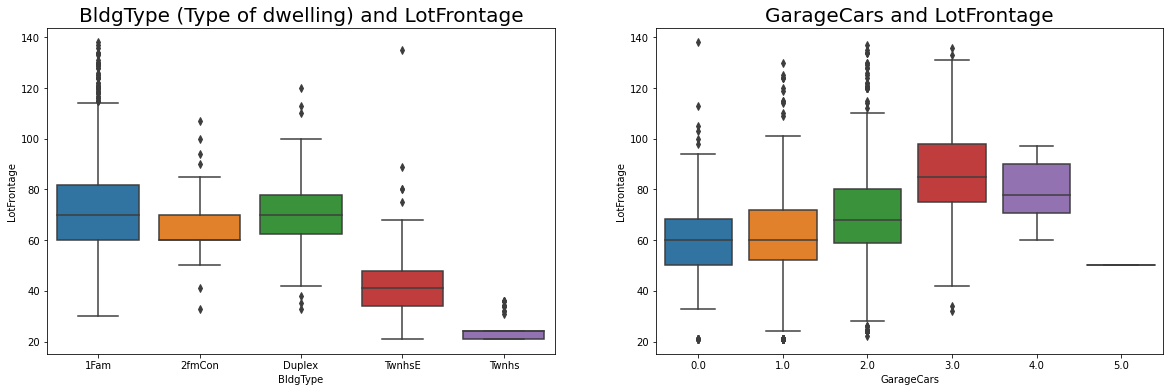

In [ ]:
#Relation between BldgType and LotFrontage
fig,ax = plt.subplots(1,2, figsize=(20,6))
sns.boxplot(x=df_main.BldgType,y=Lot_tmp_Z.LotFrontage, ax=ax[0]).set_title('BldgType (Type of dwelling) and LotFrontage',fontsize = 20)
sns.boxplot(x=df_main.GarageCars,y=Lot_tmp_Z.LotFrontage, ax=ax[1]).set_title('GarageCars and LotFrontage',fontsize = 20)
plt.show()

#### Relation between neighborhood, LotFrontage, LotArea

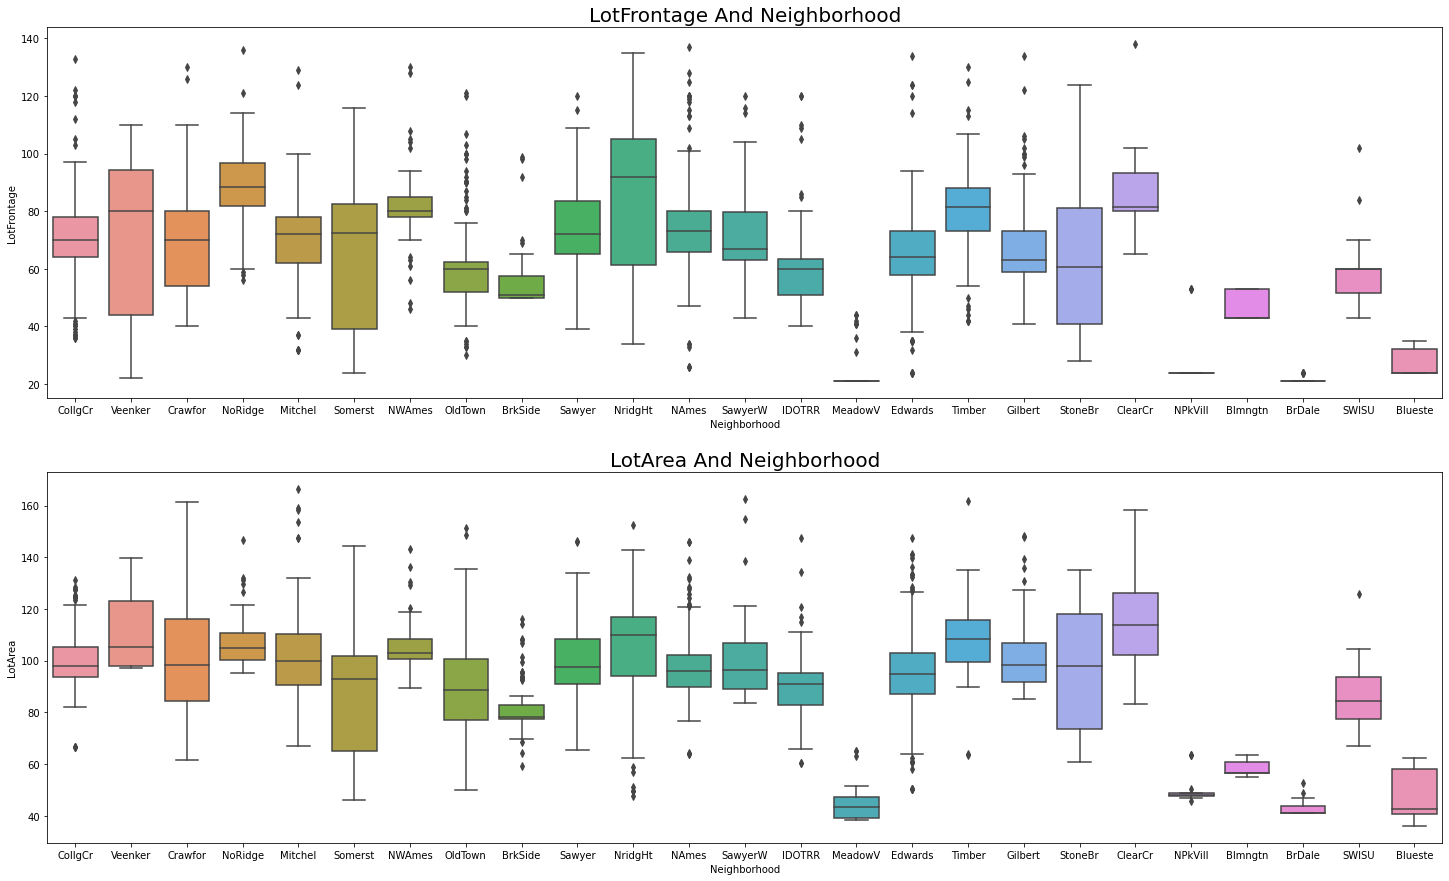

In [ ]:
# Plotting LotFrontage, LotArea and Neighborhood
fig,ax=plt.subplots(2,1,figsize=(25,15))
sns.boxplot(x=df_main.Neighborhood,y=Lot_tmp_Z.LotFrontage,ax=ax[0]).set_title('LotFrontage And Neighborhood',fontsize=20)
sns.boxplot(x=df_main.Neighborhood,y=Lot_tmp_Z.LotArea.apply(np.sqrt),ax=ax[1]).set_title('LotArea And Neighborhood',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Neighborhood And SalePrice')

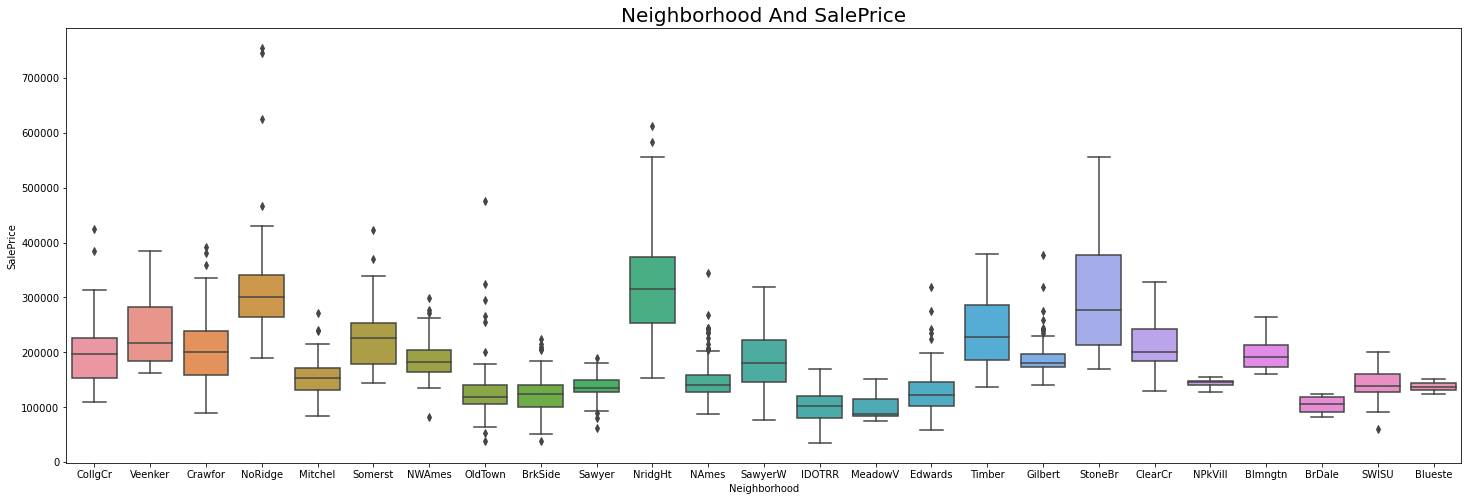

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(25,8))
sns.boxplot(x=df_main[:1460].Neighborhood , y=target).set_title('Neighborhood And SalePrice',fontsize=20)

### Inference: Overall, Houses in MeadowV, NPkVill, Blmngtn and Blueste neighborhoods have lower prices, lower LotArea and lower LotFrontage

### Training a model to predict missing values for LotFrontage

In [ ]:
#Creating temp dataframe and converting objects to dummies
LotFrontage_df=pd.get_dummies(df_main[['LandSlope','BldgType','Alley','LotConfig','MSZoning','Neighborhood','LotArea','LotFrontage']].copy())
#Replace Lotarea with it's Sqrt
LotFrontage_df['LotArea']=LotFrontage_df['LotArea'].apply(np.sqrt)

#Mask to access part of the dataframe with available LotFrontage
mask=~LotFrontage_df.LotFrontage.isnull()
#train dataset (including LotFrontage)
LotFrontage_train=LotFrontage_df.loc[mask]
#test dataset (Missing LotFrontage)
LotFrontage_Test=LotFrontage_df.loc[~mask].drop('LotFrontage',axis=1)
#Removing outliers from Train Dataframe 
z = np.abs(stats.zscore(LotFrontage_train[['LotFrontage','LotArea']]))
LotFrontage_train=LotFrontage_train[(z < 3).all(axis=1)]

#Define scaler
Scaler_L=StandardScaler()
#standardizing features
X=Scaler_L.fit_transform(LotFrontage_train.drop('LotFrontage',axis=1))
#Define target
y=LotFrontage_train['LotFrontage']
#Splitting Train dataframe
x_train,x_valid,y_train,y_valid=train_test_split(X, y ,test_size=0.3 , random_state=42)
#Defining model
model=GradientBoostingRegressor(n_estimators= 100, min_samples_split= 26, min_samples_leaf= 17, max_features='auto', max_depth= None)
#Fitting model on train data
model.fit(x_train,y_train)
#predicting validation target
y_pred=model.predict(x_valid)
#Storing mean absolute error for single mean, median and Gradien Boosting Regressor
GBoost_results= mean_absolute_error(y_valid,y_pred)
Mean_result= mean_absolute_error(y_valid,[y_valid.mean()]*len(y_valid))
Median_result= mean_absolute_error(y_valid,[y_valid.median()]*len(y_valid))
print("MEAN ABSOLUTE ERROR : ", GBoost_results)

MEAN ABSOLUTE ERROR :  7.8131947969131295


[Text(0, 0.5, 'Mean absolute error'),
 Text(0.5, 1.0, 'LotFrontage Imputation - Mean/Median Vs. GradientBoostingRegressor')]

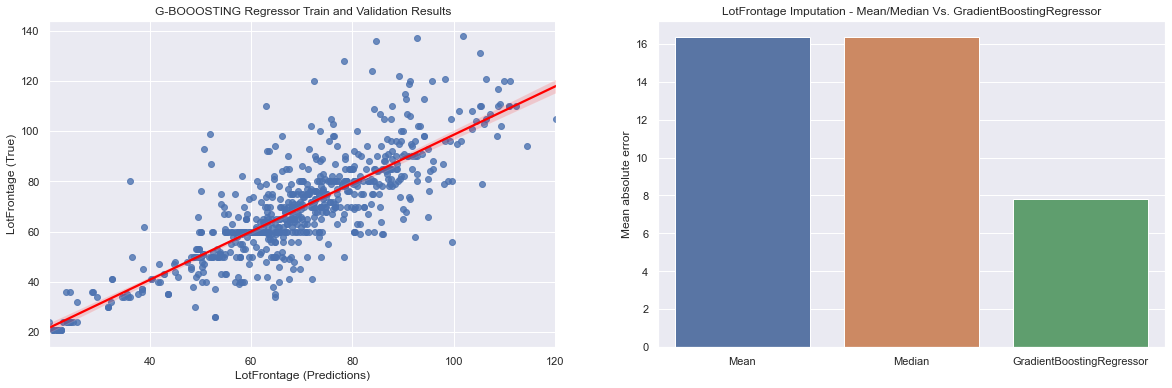

In [ ]:
#Plotting train/validation results
fig, ax= plt.subplots(1,2,figsize=(20,6))
#Show results
sns.regplot(x=y_pred,y=y_valid, line_kws={'color':'red'} , ax=ax[0]).set(title='G-BOOOSTING Regressor Train and Validation Results',xlabel='LotFrontage (Predictions)',ylabel='LotFrontage (True)')
sns.barplot(x=["Mean","Median","GradientBoostingRegressor"],y=[Mean_result,Median_result,GBoost_results], ax=ax[1]).set(title='LotFrontage Imputation - Mean/Median Vs. GradientBoostingRegressor',ylabel='Mean absolute error')

#### Mean absolute error is twice lower for Gradient Boosting Regressor compared to the simple mean or median.

In [ ]:
#Predicting Missing values for Lotfrontage
LotFrontage_Test=Scaler_L.transform(LotFrontage_Test)
LotFrontage_missings=model.predict(LotFrontage_Test)

#Fill Missing values
df_main.loc[~mask,'LotFrontage']=LotFrontage_missings

In [ ]:
check_missing(df_main)

,MissingValues


### Checking for correlation

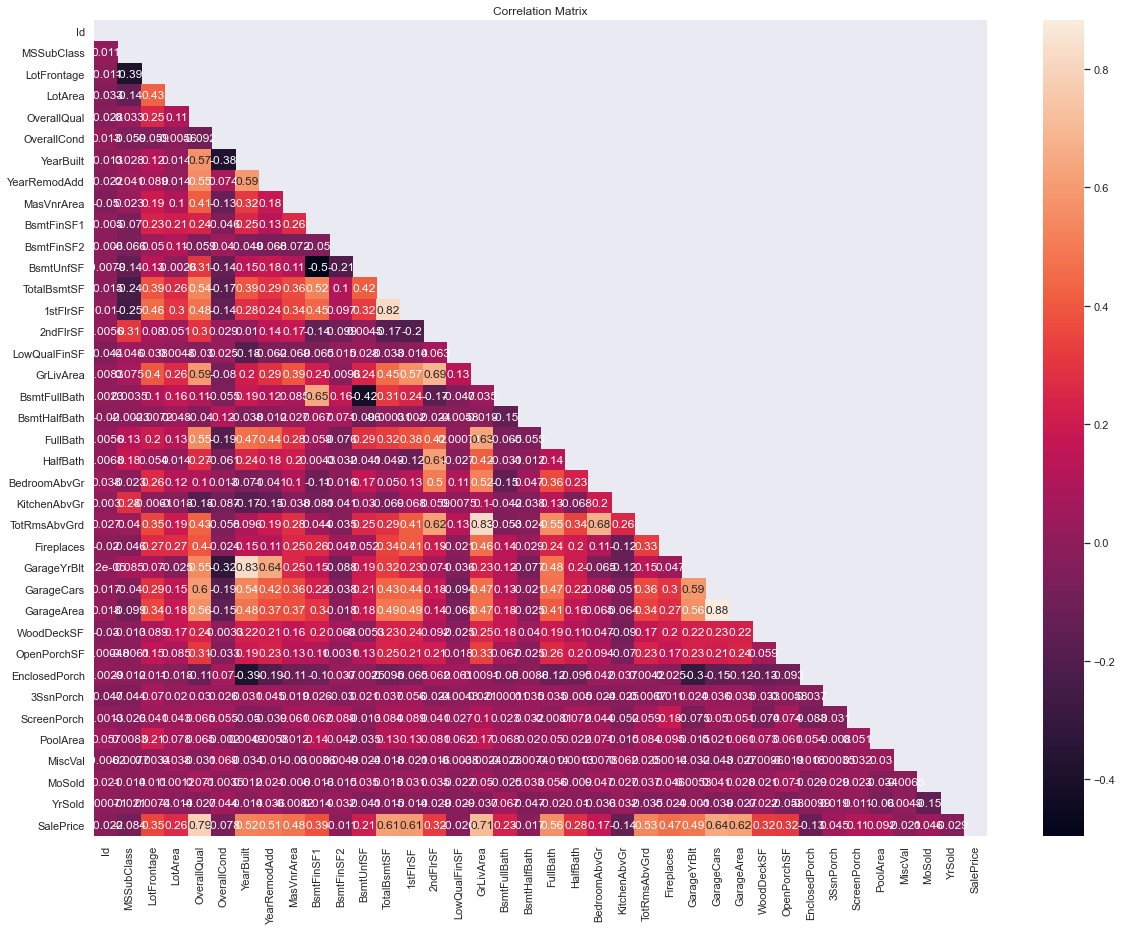

In [ ]:
#Get the correlation matrix
corr=df_train.corr()

# Getting the Upper Triangle of the co-relation matrix
UpperT = np.triu(corr)
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=UpperT,annot=True)
plt.show()

In [ ]:
#Getting sorted correlation between features and SalePrice 
df_train.corrwith(target).sort_values(ascending=False).head(50)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

Correlation > 0.60 :

OverallQual : (Rates the overall material and finish of the house - 1 to 9 )

GrLivArea : (Above grade (ground) living area square feet)

GarageCars : (Size of garage in car capacity)

GarageArea : (Size of garage in square feet)

TotalBsmtSF : (Total square feet of basement area)

1stFlrSF : (First Floor square feet)

In [ ]:
def highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    correlation_df={}
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            correlation_df[corr_df.index[i] +" and "+ corr_df.columns[j]]= v
        correlation_df=pd.DataFrame(correlation_df,index=['Correlation'])
    return  correlation_df.T.sort_values(by='Correlation',ascending=False)

In [ ]:
#print correlation between features
highly_correlated(df_main,df_main.columns).style.set_properties(**{'background-color': 'black','color': 'white'})

,Correlation
GarageCars and GarageArea,0.889890
GrLivArea and TotRmsAbvGrd,0.808354
TotalBsmtSF and 1stFlrSF,0.801638
BedroomAbvGr and TotRmsAbvGrd,0.669737
2ndFlrSF and GrLivArea,0.655085
BsmtFinSF1 and BsmtFullBath,0.638911
GrLivArea and FullBath,0.630286
YearBuilt and YearRemodAdd,0.612235
2ndFlrSF and HalfBath,0.611362
OverallQual and GarageCars,0.600743


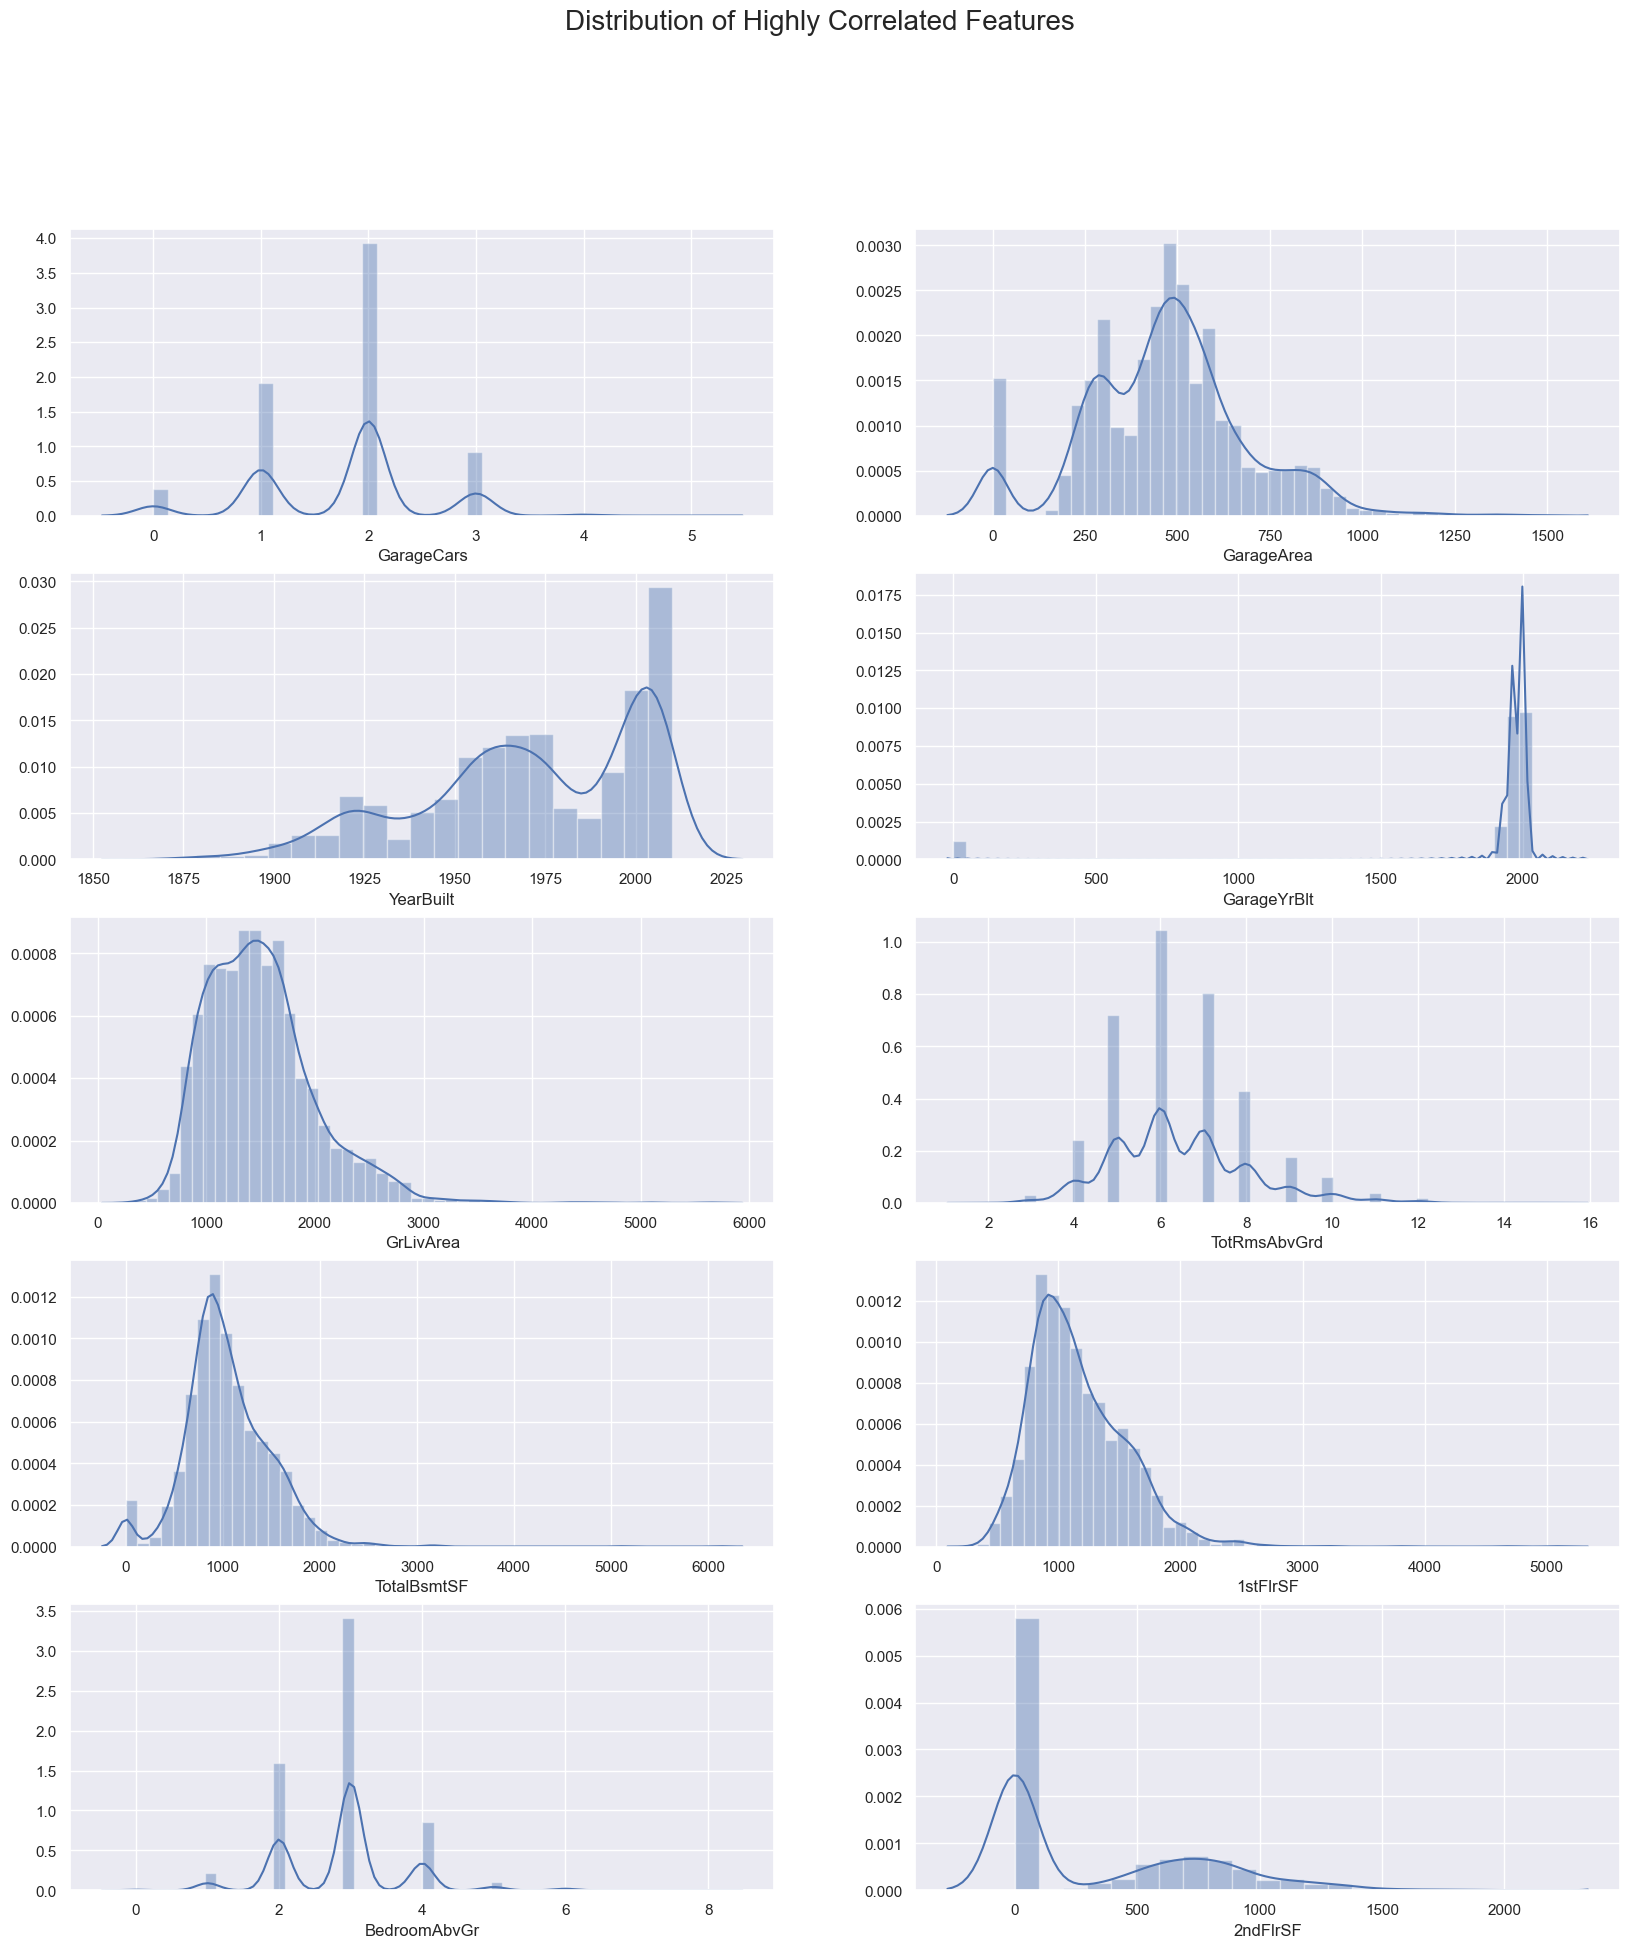

In [ ]:
#plotting histogram chart for highly correlated features 
fig, ax = plt.subplots(5,2,figsize=(20,22),dpi=100)
fig.suptitle('Distribution of Highly Correlated Features',size=20)
sns.distplot(df_main['GarageCars'],ax=ax[0,0])
sns.distplot(df_main['GarageArea'],ax=ax[0,1])
sns.distplot(df_main['YearBuilt'],ax=ax[1,0])
sns.distplot(df_main['GarageYrBlt'] ,ax=ax[1,1])
sns.distplot(df_main['GrLivArea'],ax=ax[2,0])
sns.distplot(df_main['TotRmsAbvGrd'],ax=ax[2,1])
sns.distplot(df_main['TotalBsmtSF'],ax=ax[3,0])
sns.distplot(df_main['1stFlrSF'],ax=ax[3,1])
sns.distplot(df_main['BedroomAbvGr'],ax=ax[4,0])
sns.distplot(df_main['2ndFlrSF'],ax=ax[4,1])

## Since there is high correlation between Yearbuilt and GarageYrBlt I'll drop the GarageYrBlt.

In [ ]:
#Creating a copy of data
df_main_copy=df_main.copy()
#Drop GarageYrBlt
df_main_copy.drop('GarageYrBlt', axis=1,inplace=True)

In [ ]:
#Adding new predictors 
df_main_copy['Log_GrLivArea'] = df_main_copy['GrLivArea'].apply(np.log)
df_main_copy['Log_1stFlrSF'] = df_main_copy['1stFlrSF'].apply(np.log) 
df_main_copy['Log_LotFrontage']= df_main_copy['LotFrontage'].apply(np.log) 
df_main_copy['Sqrt_LotArea']=df_main_copy['LotArea'].apply(np.log) 
# Derived variables
df_main_copy['HouseAge']=df_main_copy['YrSold']-df_main_copy['YearBuilt']
df_main_copy['Total_Rooms']= df_main_copy['BedroomAbvGr'] + df_main_copy['TotRmsAbvGrd']  
df_main_copy['GrLivArea_Score']= np.sqrt(df_main_copy['OverallQual']) * df_main_copy['GrLivArea']
df_main_copy['Total_Square_Feet'] = df_main_copy.TotalBsmtSF + df_main_copy['1stFlrSF'] + df_main_copy['2ndFlrSF']
df_main_copy['Total_Porch'] = df_main_copy.ScreenPorch + df_main_copy.EnclosedPorch + df_main_copy.OpenPorchSF + df_main_copy.WoodDeckSF + df_main_copy['3SsnPorch']
df_main_copy['OverallQualCond'] = (df_main_copy['OverallCond'] * df_main_copy.OverallQual)
df_main_copy['BsmtFinSF']=df_main_copy['BsmtFinSF1'] + df_main_copy['BsmtFinSF2'] 
df_main_copy['TotalBath_Abv']=2*df_main_copy['FullBath']+df_main_copy['HalfBath']*0.5
df_main_copy['TotalBath_Bsmt']=2*df_main_copy['BsmtFullBath']+df_main_copy['BsmtHalfBath']*0.5

In [ ]:
tmp_cols=df_main_copy.columns[df_main_copy.isin(['Gd']).any()]
tmp_cols

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'PoolQC'],
      dtype='object')

In [ ]:
# Replace marks with numbers
#Make a dict
marks = {'No':0,'None':0,'NA':0,'Mn':1,'Av':3, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}
#Apply map for each column
for column in tmp_cols:
    df_main_copy[column]=df_main_copy[column].map(marks)

In [ ]:
# Combine ExterCond,ExterQual and GarageQual,GarageCond
df_main_copy['Exter_Overall'] = df_main_copy['ExterCond'] * df_main_copy['ExterQual']
df_main_copy['Garage_Overall'] = df_main_copy['GarageQual'] * df_main_copy['GarageCond']

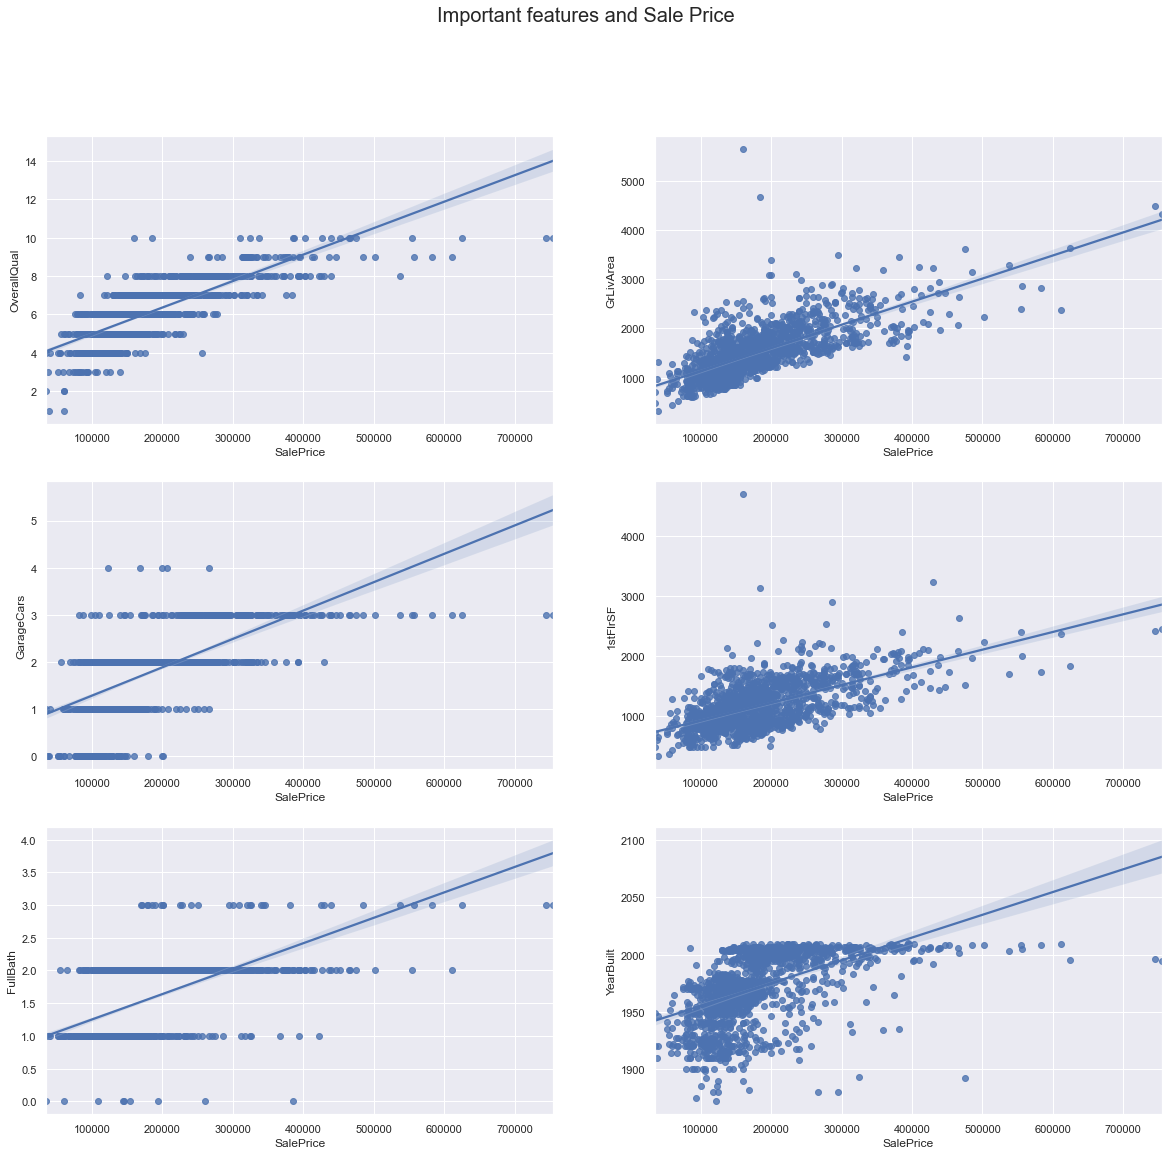

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20,18))
fig.suptitle('Important features and Sale Price',size=20)
sns.regplot(x=target,y=df_main_copy[:1460].OverallQual,ax=ax[0,0])
sns.regplot(x=target,y=df_main_copy[:1460].GrLivArea,ax=ax[0,1])
sns.regplot(x=target,y=df_main_copy[:1460].GarageCars,ax=ax[1,0])
sns.regplot(x=target,y=df_main_copy[:1460]['1stFlrSF'],ax=ax[1,1])
sns.regplot(x=target,y=df_main_copy[:1460].FullBath,ax=ax[2,0])
sns.regplot(x=target,y=df_main_copy[:1460]['YearBuilt'],ax=ax[2,1])

### As a result of Non-normal distribution of X-axis (SalePrice) samples are concentrated on the left

Text(0.5, 1.0, 'SalePrice - Log-Scale')

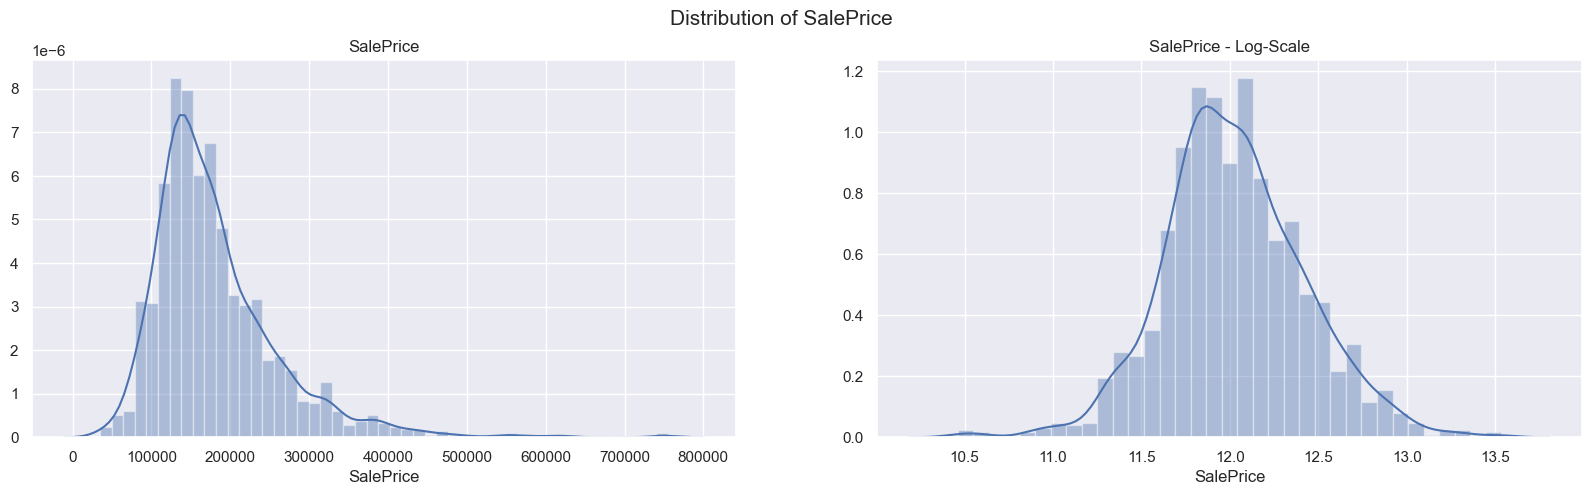

In [ ]:
#Plotting Sale Price distribiution
fig,ax=plt.subplots(1,2,figsize=(20,5),dpi=100)
fig.suptitle('Distribution of SalePrice',size=15)
sns.distplot(target, ax=ax[0]).set_title('SalePrice')
sns.distplot(target.apply(np.log), ax=ax[1]).set_title('SalePrice - Log-Scale')

In [ ]:
#taking SalePrice into logarithmic scale
target=target.apply(np.log)

## Encoding Categorical Features Using Pandas

In [ ]:
# Change the type of strings into category data type
#Create copy
df_main_copy_en=df_main_copy.copy()

#Converting objects data type to category data type
for key,value in df_main_copy_en.items():
    if pd.api.types.is_string_dtype(value):
        df_main_copy_en[key] = value.astype("category").cat.as_ordered()

In [ ]:
#Replace categories with their code
for key,value in df_main_copy_en.items():
     if not pd.api.types.is_numeric_dtype(value):
        df_main_copy_en[key] = pd.Categorical(value).codes+1

In [ ]:
df_main_copy_en.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Log_GrLivArea,Log_1stFlrSF,Log_LotFrontage,Sqrt_LotArea,HouseAge,Total_Rooms,GrLivArea_Score,Total_Square_Feet,Total_Porch,OverallQualCond,BsmtFinSF,TotalBath_Abv,TotalBath_Bsmt,Exter_Overall,Garage_Overall
0,1,60,4,65.0,8450,2,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,4,3,3,4,3,0,3,706.0,7,0.0,150.0,856.0,2,5,2,5,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,7,0,0,2,3,2.0,548.0,3,3,3,0,61,0,0,0,0,0,5,2,0,2,2008,9,5,7.444249,6.752270,4.174387,9.041922,5,11,4524.234742,2566.0,61,35,706.0,4.5,2.0,12,9
1,2,20,4,80.0,9600,2,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,3,3,2,4,3,4,1,978.0,7,0.0,284.0,1262.0,2,5,2,5,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,7,1,3,2,3,2.0,460.0,3,3,3,298,0,0,0,0,0,0,5,2,0,5,2007,9,5,7.140453,7.140453,4.382027,9.169518,31,9,3091.256055,2524.0,298,48,978.0,4.0,0.5,9,9
2,3,60,4,68.0,11250,2,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,4,3,3,4,3,1,3,486.0,7,0.0,434.0,920.0,2,5,2,5,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,7,1,3,2,3,2.0,608.0,3,3,3,0,42,0,0,0,0,0,5,2,0,9,2008,9,5,7.487734,6.824374,4.219508,9.328123,7,9,4725.311842,2706.0,42,35,486.0,4.5,2.0,12,9
3,4,70,4,60.0,9550,2,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,3,3,1,3,4,0,1,216.0,7,0.0,540.0,756.0,2,4,2,5,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,7,1,4,6,4,3.0,642.0,3,3,3,0,35,272,0,0,0,0,5,2,0,2,2006,9,1,7.448334,6.867974,4.094345,9.164296,91,10,4542.755001,2473.0,307,35,216.0,2.0,2.0,9,9
4,5,60,4,84.0,14260,2,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,4,3,3,4,3,3,3,655.0,7,0.0,490.0,1145.0,2,5,2,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,7,1,3,2,3,3.0,836.0,3,3,3,192,84,0,0,0,0,0,5,2,0,12,2008,9,5,7.695303,7.043160,4.430817,9.565214,8,13,6216.882820,3343.0,276,40,655.0,4.5,2.0,12,9


## Splitting data to train/test

#### Before dealing with outliers I have to split the combined dataframes to train and test, because we want to remove outliers only from train dataset

In [ ]:
#Drop id column
df_main_copy_en.drop('Id',axis=1,inplace=True)
#Split data after encoding
train_df=df_main_copy_en[:1460].copy()
train_df['SalePrice']=target
test_df=df_main_copy_en[1460:].copy()

# Outliers using Z-score

In [ ]:
#columns for z-score calculation
numeric_columns=train_df.columns 
#Calculating z-score using stats library
z = np.abs(stats.zscore( train_df[numeric_columns]))


I'll define a Temporary dataframe and keep the previous one safe

With the knowledge we have gained from the data so far, By changing Z value for several times and observing results we can finally decide what should be the right value for Z

In [ ]:
#Removing outliers on temporary dataframe
train_df_z=train_df.copy()[(z < 10).all(axis=1)]

print('Rows,columns Before removing outliers : ', train_df.shape )
print('Rows,columns After removing outliers : ', train_df_z.shape )

Rows,columns Before removing outliers :  (1460, 94)
Rows,columns After removing outliers :  (1422, 94)


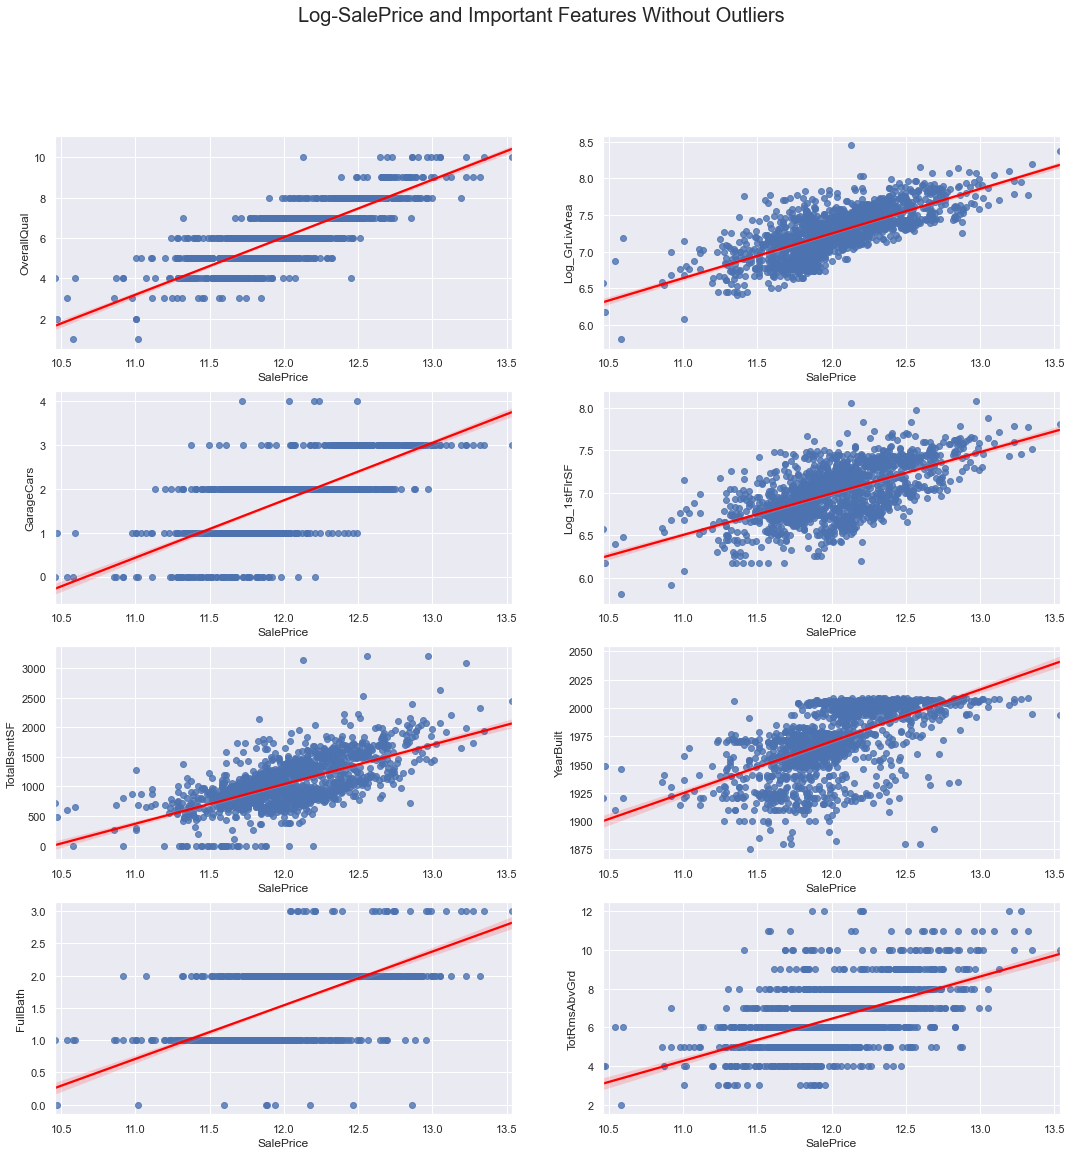

In [ ]:
#plotting important features
fig, ax = plt.subplots(4,2,figsize=(18,18))
fig.suptitle('Log-SalePrice and Important Features Without Outliers', size=20)
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.OverallQual,ax=ax[0,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.Log_GrLivArea,ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.GarageCars,ax=ax[1,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['Log_1stFlrSF'],ax=ax[1,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.TotalBsmtSF ,ax=ax[2,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['YearBuilt'],ax=ax[2,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.FullBath ,ax=ax[3,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['TotRmsAbvGrd'],ax=ax[3,1], line_kws={'color':'red'})

## Making a to_drop list

In [ ]:
#Add features to dropFullBath
to_drop=['SalePrice','Fence',
                    'HalfBath',
                    'FullBath',
                    'BsmtFullBath',
                     'BsmtHalfBath',
                     'LotConfig',
                     'Foundation',
                     'BsmtFinSF2',
                     'LotShape',
                     'MSSubClass',
                     'PoolArea',
                     'LandContour',
                     'LandSlope',
                     'BsmtHalfBath',
                     'MasVnrArea',
                     'PavedDrive',
                     'GarageFinish',
                     'MasVnrType',
                     'HeatingQC',
                     'SaleType',
                     '3SsnPorch',
                     'PoolQC',
                     'ScreenPorch',
                     'MiscFeature',
                     'Street',
                     'MiscVal',
                     'GarageArea',
                     'YearRemodAdd',
                     'YearBuilt',
                     'LotArea',
                     'GrLivArea',
                     'LotFrontage',
                     'RoofMatl',
                     'Alley',
                     'RoofStyle',
                     'Heating',
                     'BsmtFinType2',
                     'BsmtFinType1',
                     'LowQualFinSF',
                     'MoSold', 
                     '1stFlrSF',
                     '2ndFlrSF',
                     'OverallQual',
                     'OverallCond',
                     'TotalBsmtSF',
                     'YrSold',
                     'BsmtFinSF1',
                     'ExterCond',
                     'ExterQual',
                     'GarageQual',
                     'GarageCond',
                     'BsmtFinSF2']
#will be dropped from test data
to_drop_t=to_drop[1:]

In [ ]:
#Independent variables 
X=train_df_z.drop(to_drop,axis=1)
#Dependent variable
y=train_df_z['SalePrice']

#scaling features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#spliting train dataset to train and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define score functions

In [ ]:
# evaluate a given model by making predictions on X_valid
def get_v_score(model):
    valid_predictions=model.predict(X_valid)
    score=np.sqrt(mean_squared_error(y_valid, valid_predictions))
    return score

# evaluate a given model using cross-validation
def get_cv_score(model, X, y):
    #cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1))
    return np.mean(scores)

## Define models

In [ ]:
# Models name
models_name=['RandomForestRegressor',
             'GradientBoostingRegressor',
             'LinearRegression',
             'svm.SVR',
             'ExtraTreesRegressor',
             'Lasso']
# Models
models=[RandomForestRegressor(),
        GradientBoostingRegressor(),
        LinearRegression(),
        svm.SVR(),
        ExtraTreesRegressor(),
        Lasso(alpha=0.0005,tol=0.001)]

In [ ]:
#Fit and get scores for each model
scores_list=[]
for model in models:
    model.fit(X_train,y_train)
    scores_list.append(get_v_score(model))

In [ ]:
#Convert list to dataframe
data={'Model':models_name,'RMSE': scores_list}
scores_df=pd.DataFrame(data)
#Sort by valid RMSLE
scores_df.sort_values(by='RMSE').round(5)

,Model,RMSE
1,GradientBoostingRegressor,0.10654
5,Lasso,0.10754
2,LinearRegression,0.10787
0,RandomForestRegressor,0.11652
4,ExtraTreesRegressor,0.11701
3,svm.SVR,0.12739


# Stacking Models

In [ ]:
# get a stacking ensemble of models
def get_stacking():
   
    # define the base models with tuned parameters
    level0 = list()
    level0.append(('GBOOST', GradientBoostingRegressor(min_samples_split=90, min_samples_leaf=26)))
    level0.append(('RandomForest', RandomForestRegressor(min_samples_split=14, min_samples_leaf=8)))
    #level0.append(('XGB', XGBRegressor(colsample_bytree=0.6, gamma=0.4 )))
    level0.append(('ExtraTrees', ExtraTreesRegressor(min_samples_split=14, min_samples_leaf=2)))
    level0.append(('svm.SVR', svm.SVR(kernel='poly',gamma='scale',degree=1,coef0=0.30000000000000004)))
    level0.append(('ElasticNet', ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=0,tol=0.001)))
    level0.append(('Lasso', Lasso(alpha=0.0005, tol=0.001)))

    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
#Add to models list
models_name.append('StackingRegressor')
models.append(get_stacking())

In [ ]:
#Fit stacked model and get validation score
Stackedmodel=get_stacking()
Stackedmodel.fit(X_train,y_train)
print('RMSE : ', get_v_score(Stackedmodel))

RMSE :  0.099129181322354


Text(0, 0.5, 'True values')

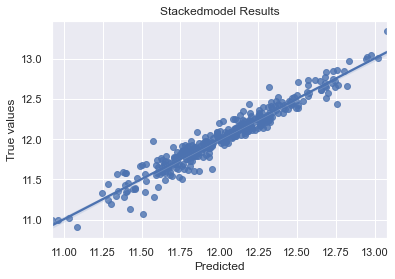

In [ ]:
y_pred=Stackedmodel.predict(X_valid)
sns.regplot(x=y_pred, y=y_valid).set_title("Stackedmodel Results")
plt.xlabel("Predicted")
plt.ylabel("True values")

Text(0.5, 1.0, 'Feature Importance')

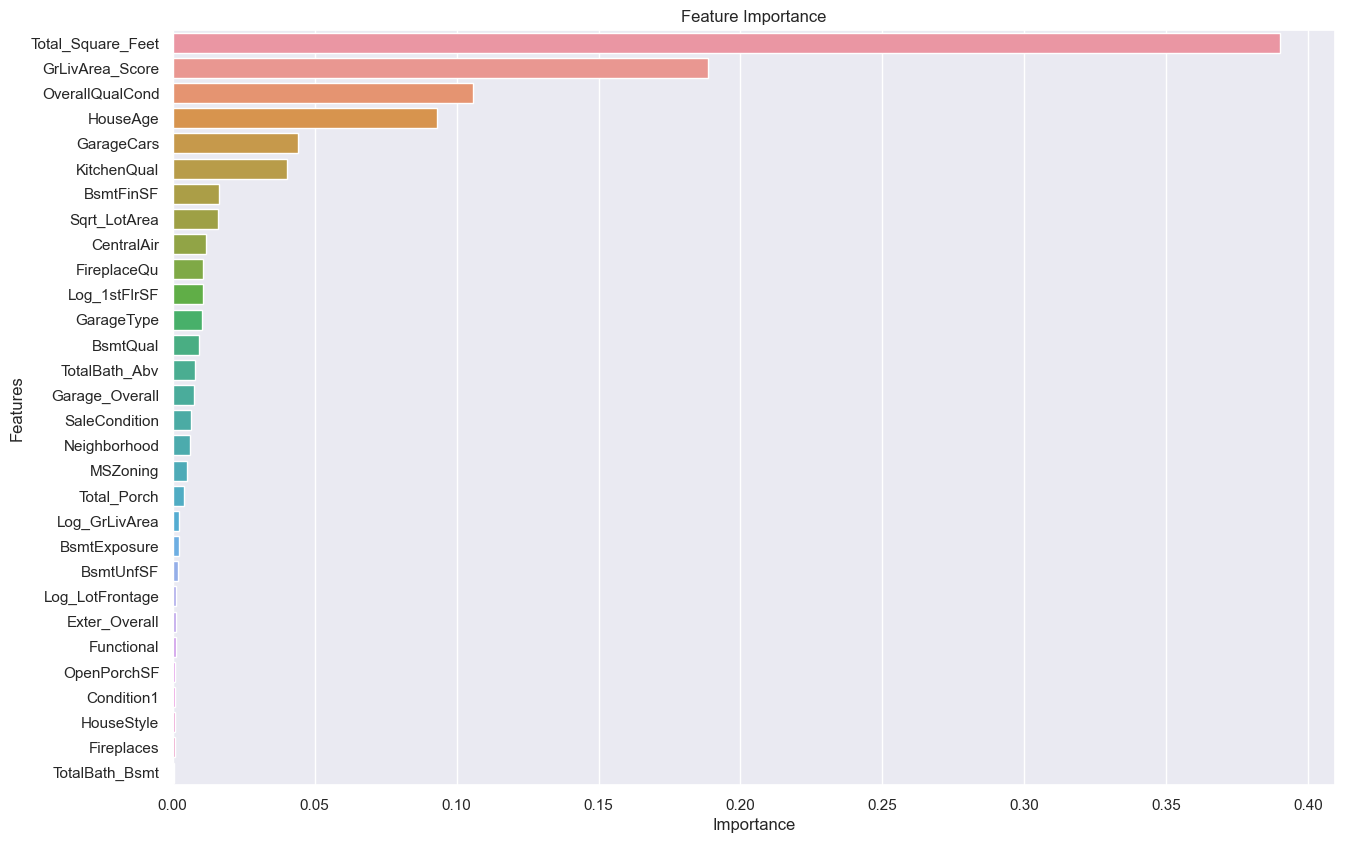

In [ ]:
# Feature importance by gradient boosting regressor
Gboost=GradientBoostingRegressor(min_samples_split=26, min_samples_leaf=29)
Gboost.fit(X_train,y_train)

#create feature importance dataframe
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': Gboost.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

## Making prediction on test data

In [ ]:
#Scaling Test data
test_df_Scaled=scaler.transform(test_df.drop(to_drop_t,axis=1))
#Getting predictions
test_df_preds=Stackedmodel.predict(test_df_Scaled)

#Adding Id column
test_preds=pd.DataFrame({'Id':df_test['Id'],'SalePrice':(np.exp(test_df_preds))})
test_preds

,Id,SalePrice
0,1461,126705.173916
1,1462,161497.389684
2,1463,174887.369384
3,1464,195175.572196
4,1465,189859.926735
5,1466,173878.640612
6,1467,175387.142463
7,1468,166310.239079
8,1469,190101.627510
9,1470,120399.451741
